In [2]:
# Import numpy and matplotlib, and use jupyter magic to
# get plots directly in notebook
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

# These two lines set nicer looking defaults for matplotlib
import seaborn as sns
sns.set(style='ticks', palette='Set2')

In [3]:
# The Bak-Sneppen model.
# See Bak, Per, and Kim Sneppen, Physical review letters 71.24 (1993): 4083.

N = 200   # Number of species
T = 5000 # Number of timesteps

# Arrays to hold age (time since evolving) and fitness
age = np.zeros((T, N ))
fitness = np.zeros((T, N))

# Initialise with random fitness
fitness[0,:] = np.random.random(N)

for t in range(1, T):
    # Copy previous time's data
    fitness[t,:] = fitness[t-1,:]
    age[t,:] = age[t-1,:] + 1    

    # Find index of least fit species
    i = np.argmin(fitness[t,:])
    
    # Set that species, and neighbours, to random
    fitness[t, i]   = np.random.random()
    fitness[t, i-1] = np.random.random()
    # Using division modulo (% operator) N to map index N to 0
    fitness[t, (i+1) % N] = np.random.random()
    
    # Set age of evolved to 0
    age[t, i]   = 0
    age[t, i-1] = 0
    # Using division modulo (% operator) N to map index N to 0
    age[t, (i+1) % N] = 0


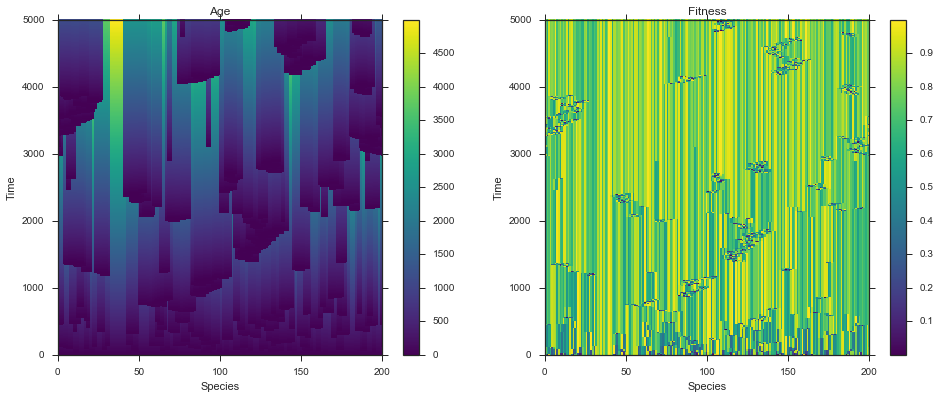

In [4]:
# Make a figure with two subplots, side by side
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (16, 6))

# Plot age per species (x-axis), as a function of time (y-axis)
mesh = axes[0].pcolorfast(age, cmap = 'viridis')
plt.colorbar(mesh, ax = axes[0])
axes[0].set_ylabel('Time')
axes[0].set_xlabel('Species')
axes[0].set_title('Age')

# Plot fitness per species (x-axis), as a function of time (y-axis)
mesh = axes[1].pcolorfast(fitness, cmap = 'viridis')
plt.colorbar(mesh, ax = axes[1])
axes[1].set_ylabel('Time')
axes[1].set_xlabel('Species')
axes[1].set_title('Fitness')